<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

## 0. python imports & setup

for learning purposes, libraries will be imported inside its corresponding usage section...

## 1. data loading

In [1]:
import pandas as pd
import numpy as np

* diamonds: labeled data we can use for training and testing
* diamonds_predict: diamonds to predict its price and upload result to Kaggle

In [2]:
df = pd.read_csv('../data/raw/diamonds_train.csv')
diamonds_predict = pd.read_csv('../data/raw/diamonds_predict.csv')

In [3]:
df.head().T

,0,1,2,3,4
carat,1.21,0.32,0.71,0.41,1.02
cut,Premium,Very Good,Fair,Good,Ideal
color,J,H,G,D,G
clarity,VS2,VS2,VS1,SI1,SI1
depth,62.4,63,65.5,63.8,60.5
table,58,57,55,56,59
price,4268,505,2686,738,4882
x,6.83,4.35,5.62,4.68,6.55
y,6.79,4.38,5.53,4.72,6.51
z,4.25,2.75,3.65,3,3.95


as you can see, there are both categorical and numerical columns...

## 2. eda

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [5]:
def histplot(df, listvar):
    fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20, 3))
    counter=0
    for ax in axes:
        df.hist(column=listvar[counter], bins=20, ax=axes[counter])
        plt.ylabel('Price')
        plt.xlabel(listvar[counter])
        counter = counter+1
    plt.show()

In [6]:
linear_vars = df.select_dtypes(include=[np.number]).columns
display(list(linear_vars))

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

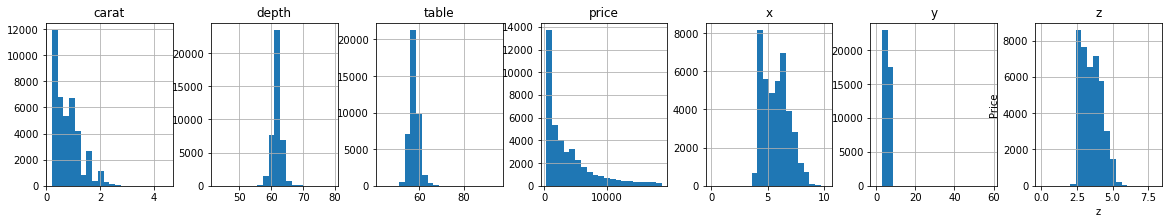

In [7]:
histplot(df,linear_vars)

In [8]:
print('0 values →', 0 in df.values)
df[linear_vars] = df[linear_vars] + 0.01
print('Filled all 0 values with 0.01. Now any 0 values? →', 0 in df.values)

0 values → True
Filled all 0 values with 0.01. Now any 0 values? → False


In [9]:
def sorteddf(df, listvar):
    for var in listvar:
        display('sorted by ' + var + ' --> ' + str(list(df[listvar].sort_values(by=var,ascending=False)[var].head())))

In [10]:
sorteddf(df, linear_vars)

'sorted by carat --> [4.51, 4.14, 4.02, 4.02, 4.01]'

'sorted by depth --> [79.01, 73.61, 72.91000000000001, 72.21000000000001, 71.81]'

'sorted by table --> [95.01, 79.01, 76.01, 73.01, 73.01]'

'sorted by price --> [18823.01, 18818.01, 18806.01, 18797.01, 18795.01]'

'sorted by x --> [10.24, 10.15, 10.03, 10.02, 10.01]'

'sorted by y --> [58.91, 10.17, 10.11, 9.95, 9.95]'

'sorted by z --> [8.07, 6.7299999999999995, 6.4399999999999995, 6.319999999999999, 6.279999999999999]'

In [11]:
def dfboxplot(df, listvar):
    fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20, 3))
    counter=0
    for ax in axes:
        df.boxplot(column=listvar[counter], ax=axes[counter])
        plt.ylabel('Price')
        plt.xlabel(listvar[counter])
        counter = counter+1
    plt.show()

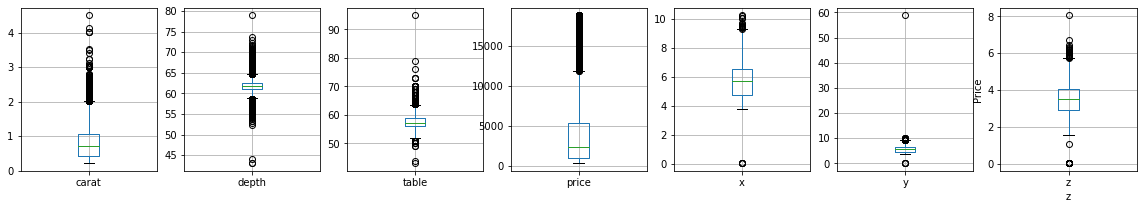

In [12]:
dfboxplot(df, linear_vars)

In [13]:
def removeoutliers(df, listvars, z):
    from scipy import stats
    for var in listvars:
        df1 = df[np.abs(stats.zscore(df[var])) < z]
    return df1

In [14]:
df = removeoutliers(df, linear_vars,2)

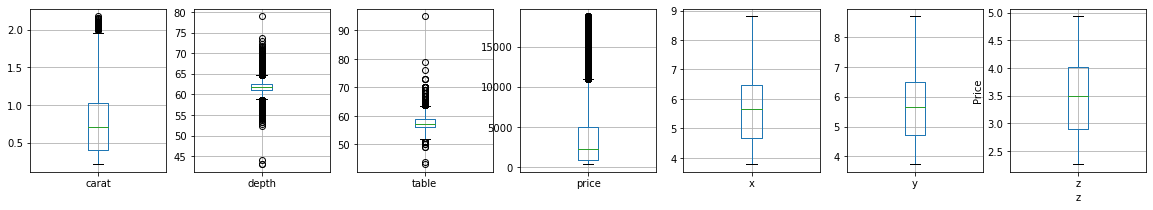

In [15]:
dfboxplot(df, linear_vars)

In [16]:
# this log converts dataframe's features inplace
def convertfeatures2log(df, listvars):
    for var in listvars:
        df[var] = np.log(df[var])

In [17]:
convertfeatures2log(df, linear_vars)

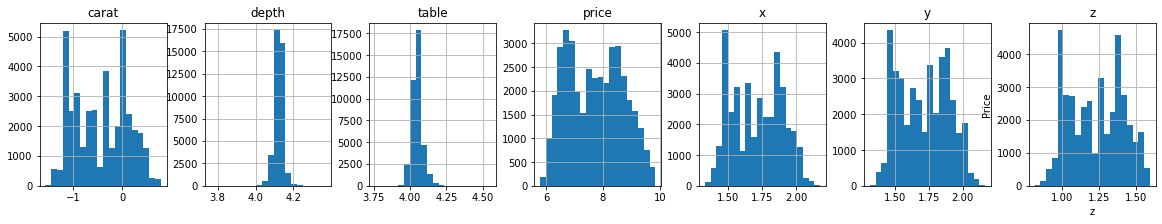

In [18]:
histplot(df, linear_vars)

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.198851,Premium,J,VS2,4.133726,4.060615,8.358903,1.922788,1.916923,1.449269
1,-1.108663,Very Good,H,VS2,4.143293,4.043227,6.224578,1.472472,1.479329,1.015231
2,-0.328504,Fair,G,VS1,4.182203,4.007515,7.895812,1.728109,1.711995,1.297463
3,-0.867501,Good,D,SI1,4.155910,4.025530,6.603957,1.545433,1.553925,1.101940
4,0.029559,Ideal,G,SI1,4.102809,4.077707,8.493312,1.880991,1.874874,1.376244


In [18]:
###Diamonds Predict a log

In [20]:
linear_vars_predict = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [24]:
diamonds_predict = removeoutliers(diamonds_predict, linear_vars_predict,2)

In [21]:
convertfeatures2log(diamonds_predict, linear_vars_predict)

/home/sergio/miniconda3/envs/lab_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [22]:
diamonds_predict.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,-0.235722,Very Good,F,SI1,4.138361,4.094345,1.761300,1.773256,1.300192
1,1,0.182322,Ideal,J,VS1,4.110874,4.043051,1.918392,1.930071,1.430311
2,2,0.451076,Premium,H,SI1,4.130355,4.110874,1.998774,1.990610,1.519513
3,3,-0.105361,Very Good,F,SI1,4.155753,3.988984,1.806648,1.813195,1.360977
4,4,-0.693147,Very Good,F,VS1,4.141546,4.060443,1.619388,1.627278,1.160021


In [23]:
#convert categoricals feats

def convert_catg(df1):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
 
    # Find the columns of object type along with their column index
    object_cols = list(df1.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df1.columns.get_loc(col))

    # Encode the categorical columns with numbers 
    for i in object_cols_ind:
        df1.iloc[:,i] = le.fit_transform(df1.iloc[:,i])

In [24]:
convert_catg(df)
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.198851,3,6,5,4.133726,4.060615,8.358903,1.922788,1.916923,1.449269
1,-1.108663,4,4,5,4.143293,4.043227,6.224578,1.472472,1.479329,1.015231
2,-0.328504,0,3,4,4.182203,4.007515,7.895812,1.728109,1.711995,1.297463


In [25]:
X_df = df.drop(['price', 'x', 'y', 'z'], axis=1)
y_df = df[['price']] # two [[ to create a DF

In [26]:
df_le = X_df.copy()
# add a new column in dataframe — join 2 dataframe columns-wise
df_le['price'] = y_df['price'].values
df_le.corr()

,carat,cut,color,clarity,depth,table,price
carat,1.000000,0.018709,0.212645,-0.215579,0.004473,0.193534,0.963280
cut,0.018709,1.000000,-0.001633,0.024668,-0.175410,0.161939,0.027506
color,0.212645,-0.001633,1.000000,-0.016830,0.041120,0.022407,0.102637
clarity,-0.215579,0.024668,-0.016830,1.000000,-0.045568,-0.082867,-0.095967
depth,0.004473,-0.175410,0.041120,-0.045568,1.000000,-0.301288,-0.022728
table,0.193534,0.161939,0.022407,-0.082867,-0.301288,1.000000,0.157977
price,0.963280,0.027506,0.102637,-0.095967,-0.022728,0.157977,1.000000


In [27]:
##Diamonds predict conver cat

In [28]:
convert_catg(diamonds_predict)

In [29]:
diamonds_predict.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,-0.235722,4,2,2,4.138361,4.094345,1.761300,1.773256,1.300192
1,1,0.182322,2,6,4,4.110874,4.043051,1.918392,1.930071,1.430311
2,2,0.451076,3,4,2,4.130355,4.110874,1.998774,1.990610,1.519513
3,3,-0.105361,4,2,2,4.155753,3.988984,1.806648,1.813195,1.360977
4,4,-0.693147,4,2,4,4.141546,4.060443,1.619388,1.627278,1.160021


In [30]:
diamonds_predict = diamonds_predict.drop(['x', 'y', 'z'], axis=1)


In [31]:
diamonds_predict.head()

,id,carat,cut,color,clarity,depth,table
0,0,-0.235722,4,2,2,4.138361,4.094345
1,1,0.182322,2,6,4,4.110874,4.043051
2,2,0.451076,3,4,2,4.130355,4.110874
3,3,-0.105361,4,2,2,4.155753,3.988984
4,4,-0.693147,4,2,4,4.141546,4.060443


In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_df = sc_X.fit_transform(X_df)
X_df[0:3]

array([[ 1.14300903,  0.43627606,  2.06229815,  0.64969899,  0.47541172,
         0.27860747],
       [-1.26628559,  1.4126951 ,  0.87096672,  0.64969899,  0.89051765,
        -0.17411061],
       [ 0.1712765 , -2.49298104,  0.27530101,  0.0722513 ,  2.57860632,
        -1.10387058]])

In [33]:
'''
diamonds_train[FEATS] == X_train
diamonds_train[TARGET] == y_train
diamonds_test[FEATS] == X_test
diamonds_test[TARGET] == y_test
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [ ]:
#LINEAR REGRESSION

In [35]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(X_train,y_train) 
#y_test=model.predict(X_test)
#y_train=model.predict(X_train)

In [34]:
y_train2 = np.exp(y_train)
y_test2 = np.exp(y_test)

In [37]:
#from sklearn.metrics import mean_squared_error
#print(f"test error: {mean_squared_error(y_pred=y_test2, y_true=y_test, squared=False)}")
#print(f"train error: {mean_squared_error(y_pred=y_train2, y_true=y_train, squared=False)}")

test error: 4645.33556810255
train error: 4586.540641299414


In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
X_df2 = np.exp(X_df)
y_df2 = np.exp(y_df)

In [40]:
scores = cross_val_score(model, 
                         X_df2, 
                         y_df2, 
                         scoring='neg_root_mean_squared_error', 
                         cv=5, n_jobs=-1)

In [41]:
import numpy as np
np.mean(-scores)

5406.004742620233

In [42]:
#KNEIGHBORS

In [43]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2)
model.fit(X_train,y_train) 
y_test=model.predict(X_test)
y_train=model.predict(X_train)

In [44]:
y_train2 = np.exp(y_train)
y_test2 = np.exp(y_test)

In [45]:
from sklearn.metrics import mean_squared_error
print(f"test error: {mean_squared_error(y_pred=y_test2, y_true=y_test, squared=False)}")
print(f"train error: {mean_squared_error(y_pred=y_train2, y_true=y_train, squared=False)}")

test error: 4282.494025472684
train error: 4275.600462928491


In [46]:
scores = cross_val_score(model, 
                         X_df2, 
                         y_df2, 
                         scoring='neg_root_mean_squared_error', 
                         cv=5, n_jobs=-1)

In [47]:
import numpy as np
np.mean(-scores)

919.3257561747014

In [48]:
##RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=256)
model.fit(X_train,y_train) 
y_test=model.predict(X_test)
y_train=model.predict(X_train)

/home/sergio/miniconda3/envs/lab_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
y_train2 = np.exp(y_train)
y_test2 = np.exp(y_test)

In [39]:
from sklearn.metrics import mean_squared_error
print(f"test error: {mean_squared_error(y_pred=y_test2, y_true=y_test, squared=False)}")
print(f"train error: {mean_squared_error(y_pred=y_train2, y_true=y_train, squared=False)}")

test error: 4947.473281257925
train error: 4864.371333648246


In [40]:
scores = cross_val_score(model, 
                         X_df2, 
                         y_df2, 
                         scoring='neg_root_mean_squared_error', 
                         cv=5, n_jobs=-1)

In [41]:
import numpy as np
np.mean(-scores)

468.34857961472454

## 7. optimize model using grid search

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
param_grid = {
    'preprocessor__strategy': ['mean', 'median'],
    'regressor__n_estimators': [16, 32, 64, 128, 256, 512],
    'regressor__max_depth': [2, 4, 8, 16],
}

grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 cv=5, 
                                 verbose=10, 
                                 scoring='neg_root_mean_squared_error', 
                                 n_jobs=-1,
                                 n_iter=32)

grid_search.fit(X_df2, y_df2)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

ValueError: Invalid parameter regressor for estimator RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=256, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [61]:
grid_search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [67]:
grid_search.best_estimator_

In [68]:
grid_search.best_score_

## 8. prepare submission

In [69]:
#NUM_FEATS = ['carat', 'depth', 'table', 'x', 'y', 'z']
#CAT_FEATS = ['cut', 'color', 'clarity']
#FEATS = NUM_FEATS + CAT_FEATS

In [42]:
y_pred = model.predict(diamonds_predict[['carat', 'depth', 'table', 'cut', 'color', 'clarity']])

In [43]:
y_pred2 = np.exp(y_pred)

In [44]:
submission_df = pd.DataFrame({'id': diamonds_predict['id'], 'price': y_pred2})

In [45]:
submission_df.head()

,id,price
0,0,1583.536674
1,1,1814.282022
2,2,2259.906142
3,3,1657.464314
4,4,817.084512


In [46]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 2 columns):
id       13485 non-null int64
price    13485 non-null float64
dtypes: float64(1), int64(1)
memory usage: 210.8 KB


In [47]:
submission_df.price.clip(0, 20000, inplace=True)

In [48]:
submission_df.to_csv('../submissions/diamonds_LRF_18_18.csv', index=False)

## 9. let's try more models...

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>